This project was part of the final course in Google Data Analytics Specialization on Coursera.  
### About the Data:
1. Data provided in the Capstone Course. A copy of 2021 datasets can be found [here](https://www.kaggle.com/datasets/atohorisrael/divvy-tripdata-jan-dec-2021) on Kaggle.
1. The dataset is a collection of bike ride details for Jan-Dec 2021.
2. It contains **_ride_id_**, **_bike_type_** (electric, classic or docked), **_ride timings_** etc.
3. It also contains user type- **_members_** or **_casual_**.

Business Objective of the Capstone Project was to:  
**Design marketing strategies aimed at converting casual riders into annual members.**

The objective of this analysis is to answer the question:  
**How do existing annual members and casual riders use Cyclistic bikes differently?**


In [ ]:
#Loading all the required packages
library(tidyverse) # metapackage of all tidyverse packages
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
#reading all the 12 files.
jan2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202101-divvy-tripdata.csv")
feb2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202102-divvy-tripdata.csv")
mar2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202103-divvy-tripdata.csv")
apr2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202104-divvy-tripdata.csv")
may2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202105-divvy-tripdata.csv")
jun2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202106-divvy-tripdata.csv")
jul2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202107-divvy-tripdata.csv")
aug2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202108-divvy-tripdata.csv")
sep2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202109-divvy-tripdata.csv")
oct2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202110-divvy-tripdata.csv")
nov2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202111-divvy-tripdata.csv")
dec2021 <- read_csv("../input/divvy-tripdata-jan-dec-2021/202112-divvy-tripdata.csv")

Rows: 96834 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 49622 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 228496 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
ch

### Steps applied in Data Wrangling:
1. All the individual datasets of 12 months were combined into one -`year_dataset`.
2. Missing values:
    + Total missing values in each column were computed. This was done to determine whether missing values were present in all the columns or some specific columns only.
    + NA values were present only in start and end stations names and id and few in end latitude, end longitude.
    + The focus of my analysis was not on the destinations, so I removed all the location columns: start_station_name/id, end_station_name/id.
    + Removed those few rows with missing end latitude and end longitude.
3. Checked for duplicate rows: none found.
4. Checked whether all values in ride_id column had 16 characters or not.
5. Created 4 variable columns- `ride_duration`, `day`, `month`, `hour_of_day`.
6. Removed all rows with negative or 0 ride duration.
7. Renamed columns- rideable_type to bike_type & member_casuals to user_type.
    

In [ ]:
#combining all months data into 1 dataframe
year_dataset <- rbind(jan2021, feb2021, mar2021, apr2021, may2021, jun2021, jul2021,
                      aug2021, sep2021, oct2021, nov2021, dec2021)

In [ ]:
#following code calculates the total missing values per column.
#it helps to determine the manner in which to treat rows &  columns with missing values

total_na_count <- rbind(colSums(is.na(year_dataset)))
#preview of the the missing values
head(total_na_count)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0,0,690809,690806,739170,739170,0,0,4771,4771,0


The following code removes station names and station id columns.

In [ ]:
#There are a lot of missing values in station names and ids. So, removing those columns first.
year_dataset <- select(year_dataset,-c("start_station_name", "start_station_id",
                                       "end_station_name","end_station_id"))

In [ ]:
#checking all columns in the dataset
colnames(year_dataset)

[1] "ride_id"       "rideable_type" "started_at"    "ended_at"     
[5] "start_lat"     "start_lng"     "end_lat"       "end_lng"      
[9] "member_casual"

In the following code:
+ `na_end_grid` stores the row number of all such rows which have NA value for end station latitude, end station longitude.  
+ Such rows do not have any data for end station- name, id, latitude, longitude all these parameters are missing. So, such rows are being removed.

In [ ]:
#na_end_grid stores row numbers for all remaining rows with missing values & the only missing
#values are in end_lat and end_lng columns
na_end_grid <- which(is.na(year_dataset$end_lat) | is.na(year_dataset$end_lng))
#deleting these rows from the dataset
year_dataset <- year_dataset[-na_end_grid,]

The following code checks whether any more NA values are present in the dataset or not.  
If 0 is returned, it implies no missing values.

In [ ]:
#checking for any more NA values
sum(is.na(year_dataset))

[1] 0

The following code returns the total number of duplicate rows.  
If 0 is returned, it implies no duplicate rows found.

In [ ]:
#checking for duplicate rows- no duplicate rows found
sum(duplicated(year_dataset))

[1] 0

In the following code, `id_length` stores the length of `ride_id` (total number of characters) for each record.
And `distinct()` returns all the distinct length values.  
Here, only 16 is returned, which implies that in all records, number of characters in ride_id is 16.  
All are valid ids.

In [ ]:
#count the number of characters in "ride_id" values
id_length <- data.frame(nchar(year_dataset$ride_id))
#checking for length of all ride_id values. 
distinct(id_length)

nchar.year_dataset.ride_id.
<int>
16


Following code creates 4 columns:  
+ ride_duration,
+ day of the week, 
+ hour of the day,
+ month of the year.

In [ ]:
#CREATING columns- duration, distance, day of week.
year_dataset$ride_duration <- as.numeric(difftime(year_dataset$ended_at, year_dataset$started_at), units="mins")
#label = TRUE implies that this day column will contain name of the day- mon,tues,.. & not day number.
year_dataset$day <- wday(year_dataset$started_at, label = TRUE)
year_dataset$hour_of_day <- hour(year_dataset$started_at)
year_dataset$month <- month(year_dataset$started_at,label=TRUE)

Following code first calculates total number of records with ride duration <= 0.  
And then, such rows are removed from the dataset.

In [ ]:
#total number of rows with ride duration less than 1 minute (including -ve and 0 duration)
nrow(year_dataset %>% filter(ride_duration <= "0 min"))
#removing all rows with duration <= 0 minute.
year_dataset <- year_dataset[year_dataset$ride_duration > 0,]
#all 652 rows removed.

[1] 652

In [ ]:
#renaming few columns for better readability.
year_dataset <- rename(year_dataset, bike_type = rideable_type, user_type = member_casual)
head(year_dataset,3)

ride_id,bike_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,user_type,ride_duration,day,hour_of_day,month
<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<int>,<ord>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.90034,-87.69674,41.89,-87.72,member,10.416667,Sat,16,Jan
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.90033,-87.69671,41.90,-87.69,member,4.066667,Wed,18,Jan
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.90031,-87.69664,41.90,-87.70,member,1.333333,Thu,22,Jan


In [ ]:
glimpse(year_dataset)

Rows: 5,589,640
Columns: 13
$ ride_id       <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683FE3F2…
$ bike_type     <chr> "electric_bike", "electric_bike", "electric_bike", "elec…
$ started_at    <dttm> 2021-01-23 16:14:19, 2021-01-27 18:43:08, 2021-01-21 22…
$ ended_at      <dttm> 2021-01-23 16:24:44, 2021-01-27 18:47:12, 2021-01-21 22…
$ start_lat     <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 41.900…
$ start_lng     <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.69670, -…
$ end_lat       <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 41.940…
$ end_lng       <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.70000, -…
$ user_type     <chr> "member", "member", "member", "member", "casual", "casua…
$ ride_duration <dbl> 10.4166667, 4.0666667, 1.3333333, 11.7000000, 0.7166667,…
$ day           <ord> Sat, Wed, Thu, Thu, Sat, Sat, Mon, Thu, Sat, Sun, Sat, S…
$ hour_of_day   <int> 16, 18, 22, 13, 2, 14, 5, 15, 9, 19, 12, 15, 15, 15, 15,…
$ month     

In [ ]:
summary(year_dataset)

   ride_id           bike_type           started_at                 
 Length:5589640     Length:5589640     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-07 00:12:02  
 Mode  :character   Mode  :character   Median :2021-08-01 02:09:00  
                                       Mean   :2021-07-29 07:53:52  
                                       3rd Qu.:2021-09-24 16:41:35  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                     start_lat       start_lng         end_lat     
 Min.   :2021-01-01 00:08:39   Min.   :41.64   Min.   :-87.84   Min.   :41.39  
 1st Qu.:2021-06-07 01:05:07   1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88  
 Median :2021-08-01 02:36:11   Median :41.90   Median :-87.64   Median :41.90  
 Mean   :2021-07-29 08:14:51   Mean   :41.90   Mean   :-87.65   Mean   :41.90  
 3rd Qu.:2021-09-24 16:58:39   3rd Qu.:41.93   3

### 1. What is the count of each user type- members & casual riders in the final dataset?

In [ ]:
#percentage of casual users and members in the dataset
year_dataset %>%
group_by(user_type) %>%
summarize(total_count = length(ride_id), in_percent = (length(ride_id)/nrow(year_dataset))*100)

user_type,total_count,in_percent
<chr>,<int>,<dbl>
casual,2525174,45.17597
member,3064466,54.82403


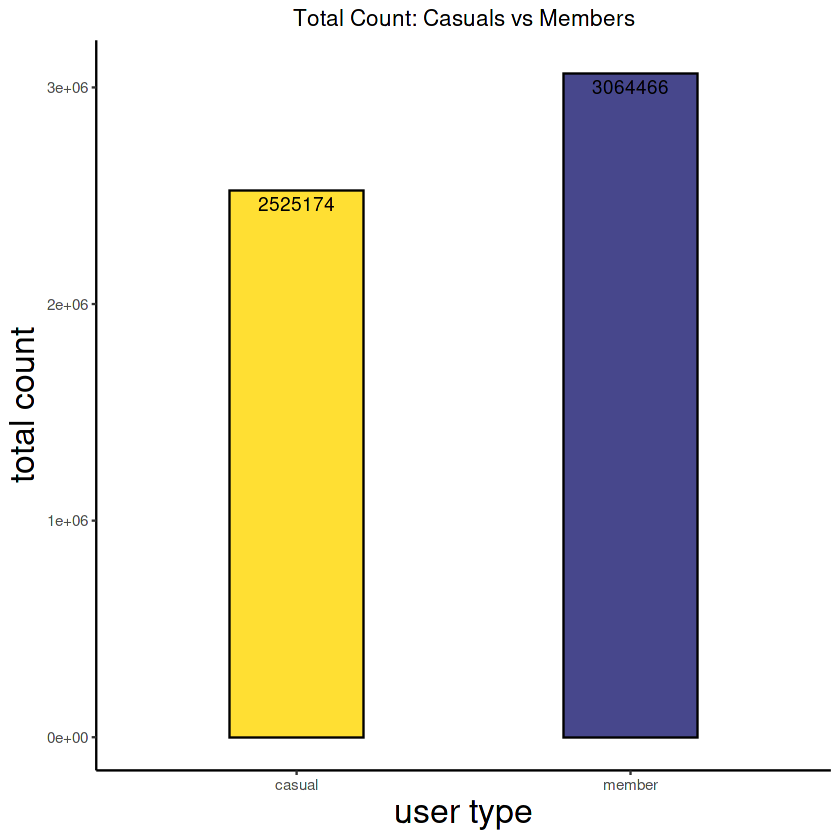

In [ ]:
#count of each user type in the dataset
ggplot(data = year_dataset, aes(x = user_type, fill = user_type)) +
geom_bar(width = 0.4,color = "black",alpha=0.8) +
geom_text(aes(label = ..count.. ),vjust=1.5,stat = "count", color = "black") +
labs(title = "Total Count: Casuals vs Members", x = "user type", y = "total count") +
theme_classic() +
theme(plot.title=element_text(hjust=0.5,family="mono"),
     axis.title = element_text(size=20),legend.position="none") +
scale_fill_manual(values = c("gold1","midnightblue"))

#### Observation: 
In the dataset, member users account for 54% of the data and casual users account for 45%.

### 2. Which is the busiest day of the week?


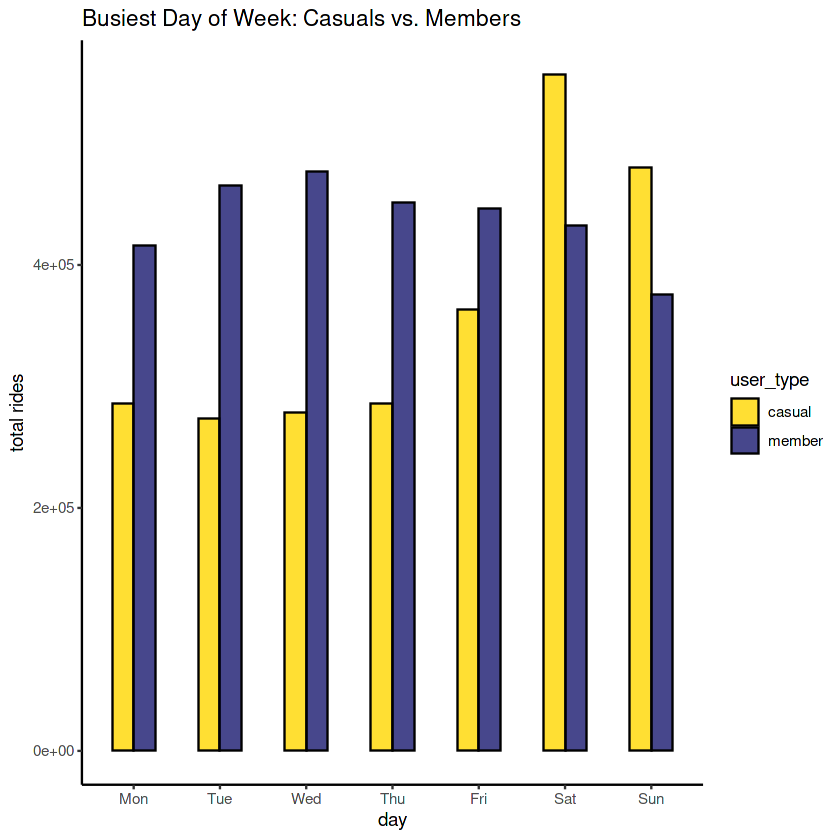

In [ ]:
#Busiest day of the week
year_dataset %>%
mutate(day = fct_relevel(day,"Mon","Tue","Wed","Thu","Fri","Sat","Sun")) %>%
ggplot(aes(x=day,fill=user_type)) +
geom_bar(position="dodge",width=0.5,color="black",alpha=0.8) +
labs(title="Busiest Day of Week: Casuals vs. Members",y="total rides") +
theme_classic() +
scale_fill_manual(values = c("gold1","midnightblue"))

#### Observation: 
1. **Weekdays-** 
+ Member riders use the bike service more as compared to casual riders.  
+ Casual riders have a higher count on Fridays among all weekdays.  

2. **Weekends-** 
+ Casual riders prefer using the bike service more on weekends, with maximum traffic on Saturdays.
+ Cyclistic bike services are used more by casual users on weekends as compared to members.

### 3. Which is the busiest day in a week for every month? 

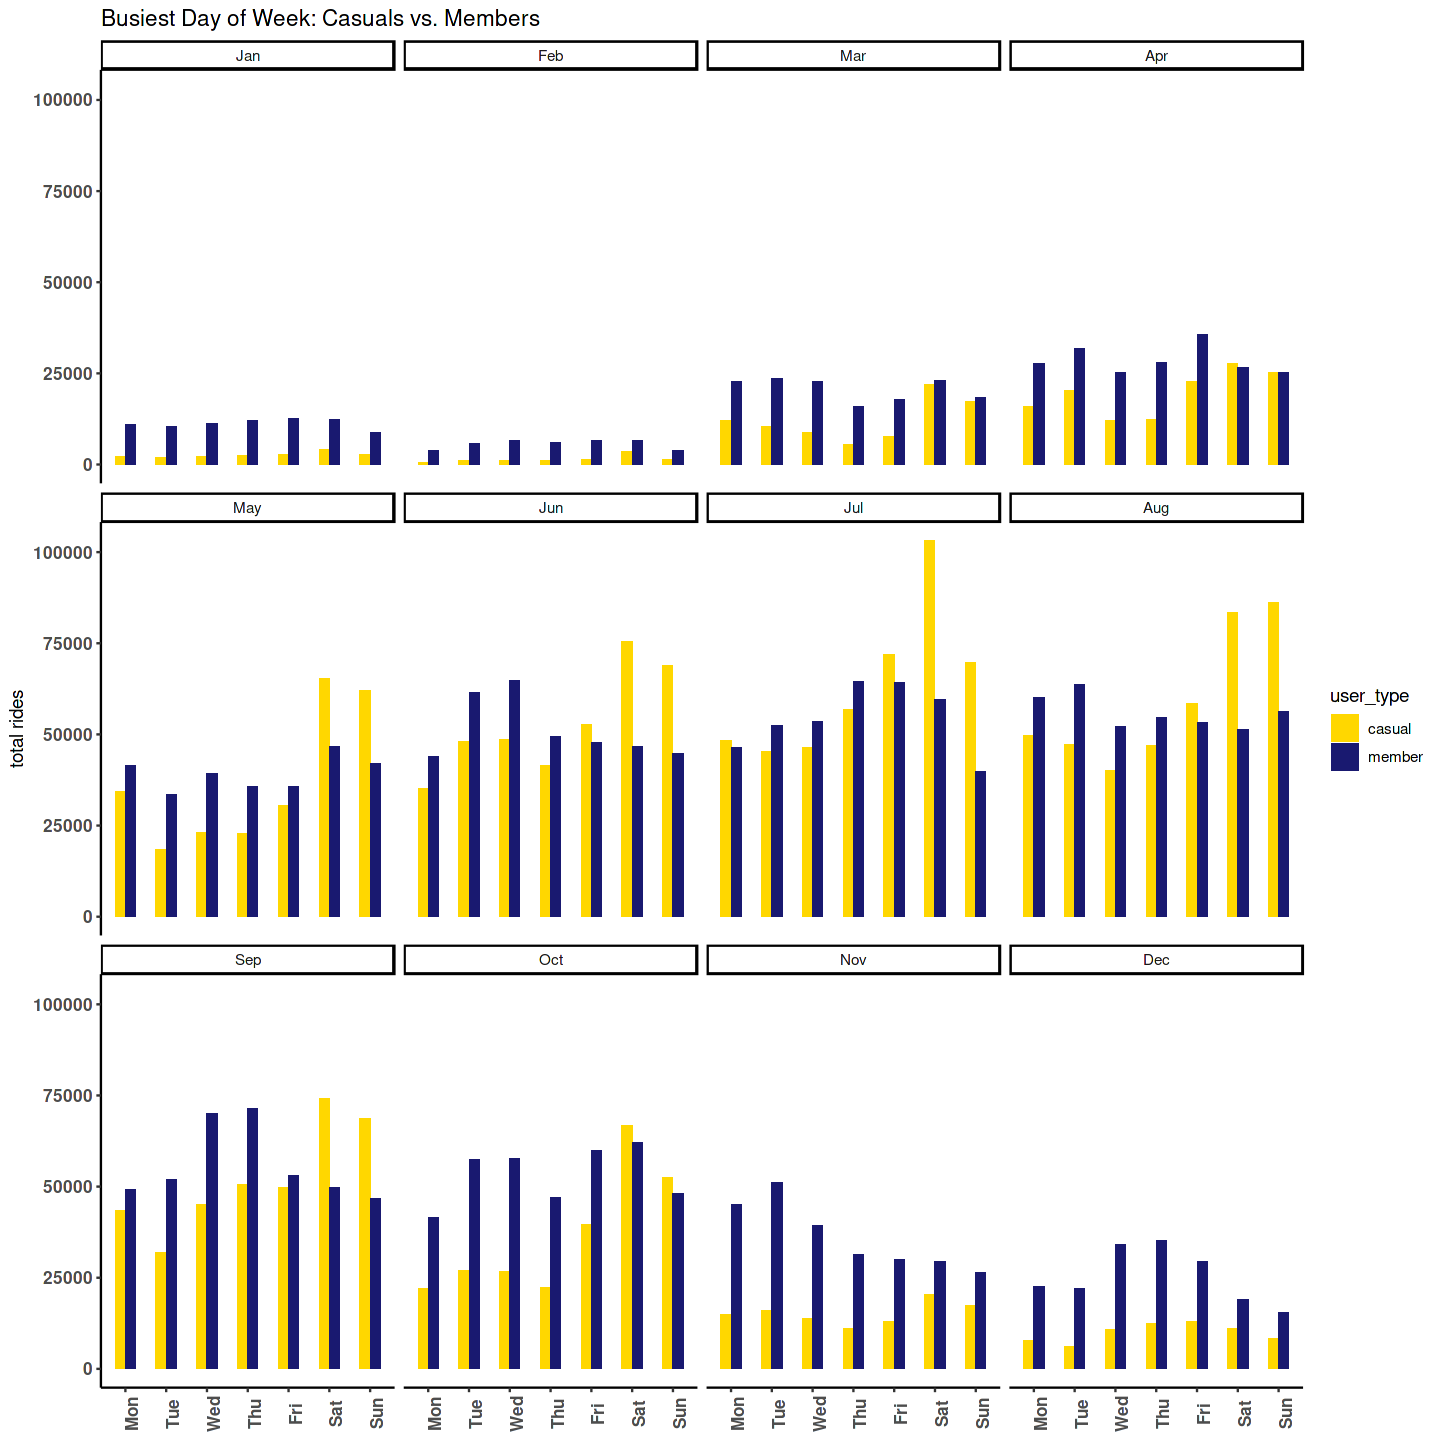

In [ ]:
#busiest day in a week per month
options(repr.plot.width = 12, repr.plot.height = 12)
year_dataset %>%
mutate(day = fct_relevel(day,"Mon","Tue","Wed","Thu","Fri","Sat","Sun")) %>%
ggplot(aes(x=day,fill=user_type)) +
geom_bar(position="dodge",width=0.5) +
labs(title="Busiest Day of Week: Casuals vs. Members",y="total rides") +
theme_classic() +
scale_fill_manual(values = c("gold","midnightblue")) +
facet_wrap(~month) +
theme(axis.text.x = element_text(angle=90),axis.text=element_text(size=10,face="bold"),
     axis.title.x=element_blank())
#coord_flip()

#### Observation:
1. Saturdays and Sundays see more traffic by casual riders.
2. Months of January and February account for minimum usage in bike service.
3. The demand of bike service is considerably low in the Winter months- November, December, January and February for Casual riders.
4. The demand of service among casual riders starts increasing from month of March and peaks in the month of July.


### 4. Which is the busiest month in the year?
#### Seasons in Chicago:
1. Spring- March, April, May
2. Summer- June, July, August
3. Autumn- September, October, November
4. Winter- December, January, February  
**Source:** [seasonsyear](https://seasonsyear.com/USA/Illinois/Chicago)

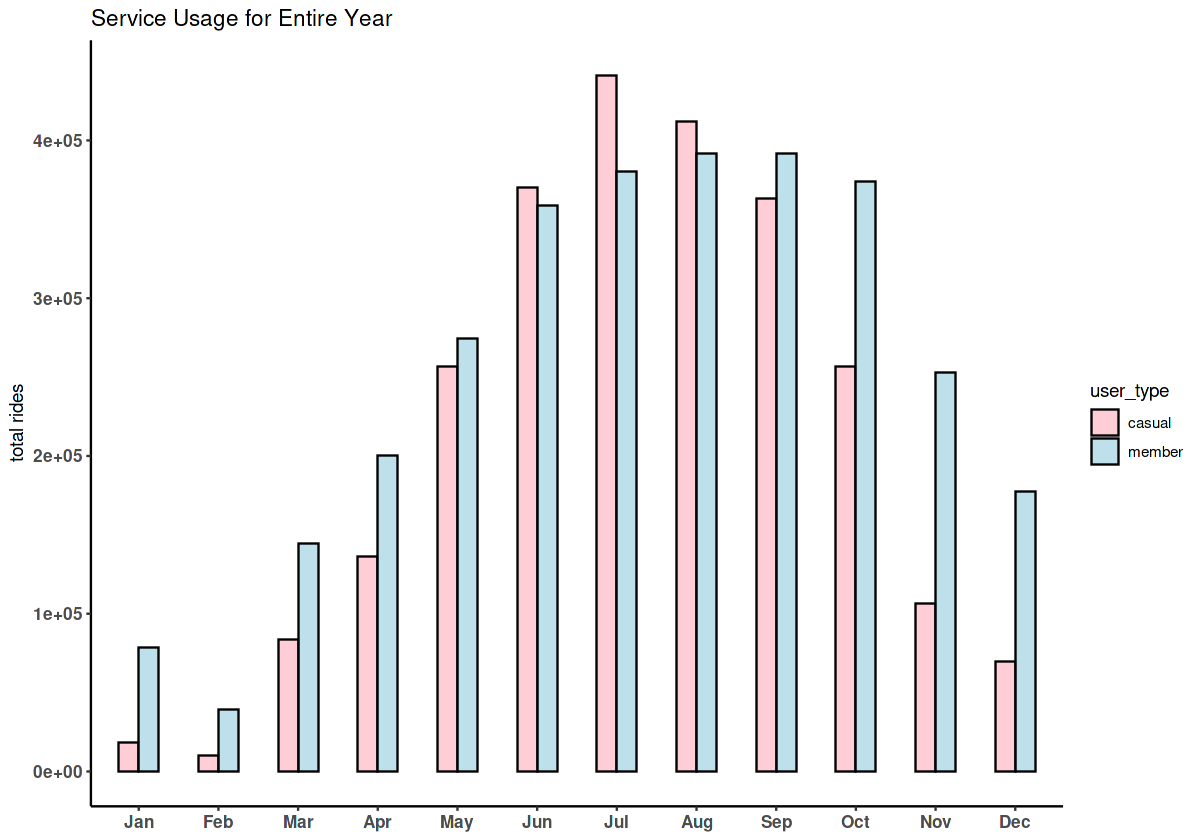

In [ ]:
#Total rides count per month in 2021
options(repr.plot.width = 10, repr.plot.height = 7)
year_dataset %>%
ggplot(aes(x=month,group_by=user_type,fill=user_type)) +
geom_bar(stat="count",width=0.5,alpha=0.8,color="black",position="dodge") +
theme_classic() +
scale_fill_manual(values = c("pink","lightblue")) +
labs(title="Service Usage for Entire Year",y="total rides") +
theme(axis.title.x=element_blank(),axis.text=element_text(size=10,face="bold"))

#### Observation:
1. Casual riders: July and August are the busiest month.
2. Member riders: August & September are the busiet month.
3. Trend:
    + **Casuals**- demand progressively rises from Feb, peaks in July and then starts decreasing with minimum usage in Feb.
    + **Members**- demand indreases from March with a stability in months of June-October.

### 5. Which type of bike- classic or electric, is preferred more by the users?

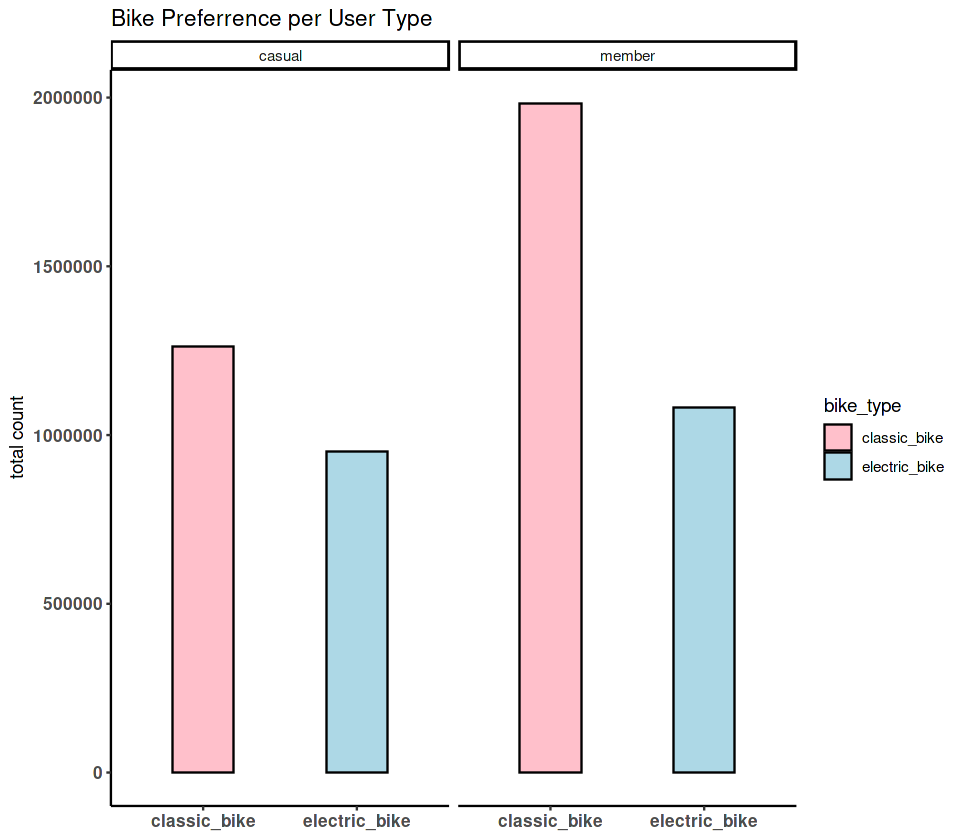

In [ ]:
#Most Preferred type of bike by Casual Users vs Members
options(repr.plot.width = 8, repr.plot.height = 7)
year_dataset %>%
filter(bike_type == "electric_bike" | bike_type == "classic_bike") %>%
ggplot(aes(x=bike_type,fill=bike_type)) +
geom_bar(stat="count",width=0.4,color="black") +
theme_classic() +
scale_fill_manual(values=c("pink","lightblue")) +
labs(title="Bike Preferrence per User Type",y="total count") +
theme(axis.title.x=element_blank(),axis.text=element_text(size=10,face="bold")) +
facet_wrap(~user_type)

#### Observation:
Both casual riders and members prefer classic bikes over electric bikes.

### 6. Which type of bike is preferred for long rides ?
##### (Assumption: Long rides are rides with duration > 1 day) 

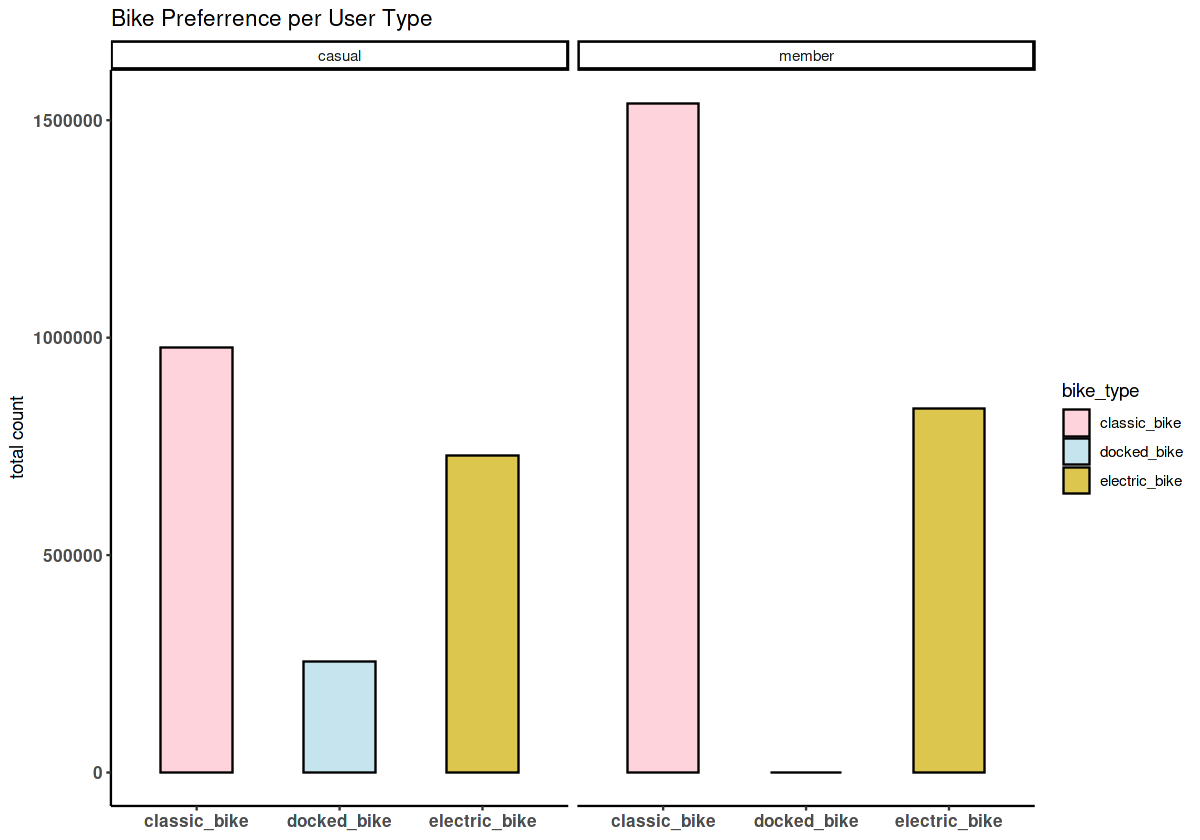

In [ ]:
#bike preferred for long rides- rides greater than 1 day
options(repr.plot.width = 10, repr.plot.height = 7)
year_dataset %>%
filter(ride_duration > "1440 mins") %>%
ggplot(aes(x=bike_type,fill=bike_type)) +
geom_bar(stat="count",width=0.5,color="black",alpha=0.7) +
theme_classic() +
scale_fill_manual(values=c("pink","lightblue","gold3")) +
labs(title="Bike Preferrence per User Type",y="total count") +
theme(axis.title.x=element_blank(),axis.text=element_text(size=10,face="bold")) +
facet_wrap(~user_type)

#### Observation:
Even for longer rides, classic bikes are preferred over electric bikes by both casual users and members.

### 7. Have bikes been hired for duration for more than 1 month?
##### (Tried to assess whether these are outliers.)

In [ ]:
#creating a data frame containing total ride duration greater or less than 1 month
less_than_month <- nrow(year_dataset %>% filter(ride_duration < "43200 mins"))
more_than_month <- nrow(year_dataset %>% filter(ride_duration >= "43200 mins"))
duration_data <- data.frame(duration = c("<month", ">=month"), total_count = c(less_than_month,more_than_month))

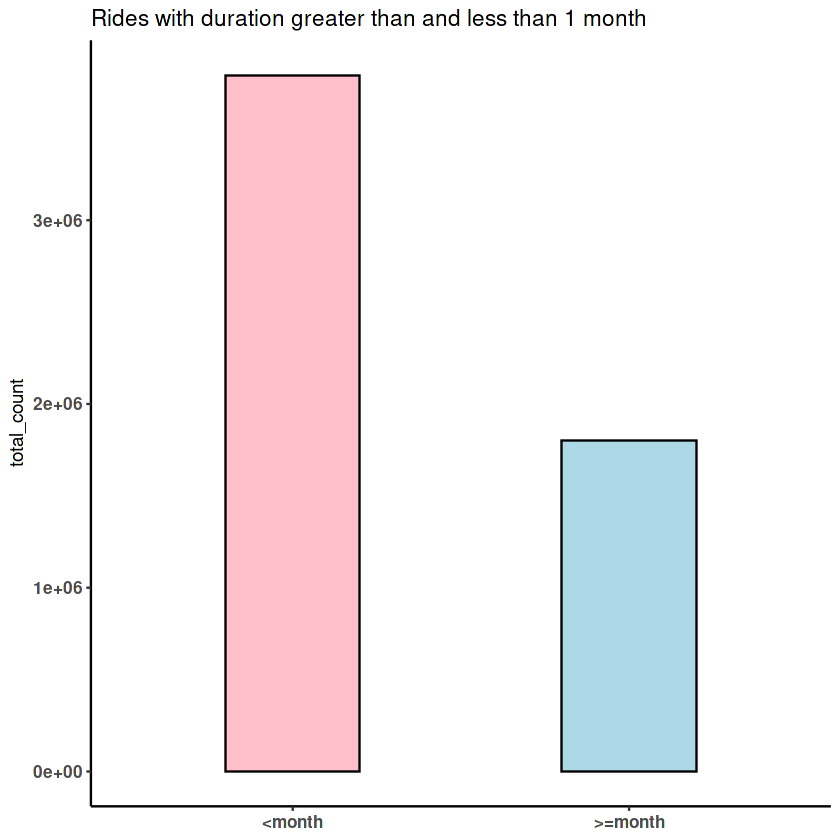

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
ggplot(data = duration_data, aes(duration,total_count)) +
geom_bar(stat="identity",width = 0.4, color="black",fill=c("pink","lightblue")) +
labs(title="Rides with duration greater than and less than 1 month") +
theme_classic() +
theme(axis.text=element_text(face="bold",size=10), axis.title.x=element_blank())

#### Observation:
Turns out, there are considerable number of records with duration greater than 1 month.  
Hence, records with duration > 1 month are not being considered as outliers.

### 8. What is the average duration of ride for each user type?

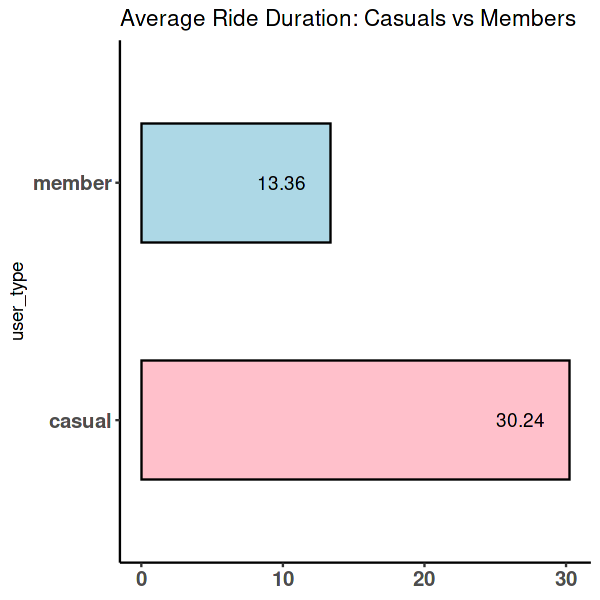

In [ ]:
#analysing average duration of each user
options(repr.plot.width = 5, repr.plot.height = 5)
year_dataset %>%
group_by(user_type) %>%
summarize(avg_duration = mean(ride_duration)) %>%
ggplot(aes(x=user_type,y=avg_duration)) +
geom_bar(stat="identity",color="black",fill=c("pink","lightblue"),width=0.5) +
theme_classic() +
geom_text(aes(label=round(avg_duration,2)),hjust=1.5,color="black")+
labs(title="Average Ride Duration: Casuals vs Members",y="average ride duration") +
theme(axis.title.x=element_blank(),axis.text=element_text(size=12,face="bold")) +
coord_flip()

#### Observation:
Casual riders hire Cyclistic bikes for longer duration compared to member users.

#### Summary of analysis:
1. Casual users hire Cyclistic bikes in higher number on weekends- especially Saturdays.
2. Months that see high surge in casual users are- June, July and August.
3. Months with minimum users- winter season: Dec, Jan and Feb.
4. Casual users hire bikes for longer duration.


#### Recommendations:
1. Offering more perks in Summer months.
2. Offering coupons for travel destinations on weekends to members.  
    + **_This requires further analysis on most frequented destinations by casual users on weekends._**
    + Such weekend offers can lure casual users to get Cyclistic membership.
3. Giving travel points for long rides. These points can later be added in exchange for subscription renewal etc.
4. Marketing campaigns must be organised in the months of February- just before spring season. The count of casual customers progressively increases from **Winter < Spring < Summer.**  

#### Final Note:
Futher more analysis can be done using the location data and GPS coordinates. But I'm ending it here. More for future projects. 😁